**TODO:**

* Clean up
* Write helper function for initializing indices, training weights.
* Do Batch Normalization!

# Introduction

In [1]:
# TODO

# Imports

In [2]:
import numpy as np
np.set_printoptions(precision=2, threshold=2)
import random
random.seed(1)
from neural_net import (NeuralNetwork, 
                        Layer, 
                        Linear)
from activation_functions import sigmoid
from helpers import (get_mnist_X_Y, 
                     momentum_range,
                     _plot_learning_rate_decay)
from python_custom.misc import (numpy_round, 
                                list_index_wraparound)
%matplotlib inline

Neural nets here are defined as a series of layers, each of which gets values from a prior layer and then feeds that information through an activation function into the next layer.

# Baseline neural net - TODO: write helper functions for this

In [3]:
X, Y = get_mnist_X_Y()

In [4]:
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2)
        ]
    )

In [5]:
# TODO: make this a class method
def neural_net_pass(net, x, y):
    pred = net.forwardpass(x)
    loss = net.loss(pred, y)
    net.backpropogate(loss)
    return pred

In [6]:
from sklearn.model_selection import train_test_split

train_prop = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=1-train_prop, 
    random_state=4)

In [7]:
data_size = X.shape[0]
train_size = int(train_prop * data_size)
indices = list(range(train_size))
random.shuffle(indices)

# Baseline

In [27]:
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2)
        ]
    )

In [28]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist, x, y)

In [29]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
accuracy

0.90342857142857147

## 3 layer

In [38]:
nn_mnist_deep = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=100,
               activation_function=sigmoid, 
               random_seed=1),
        Linear(n_in=100,
               n_out=25,
               activation_function=sigmoid, 
               random_seed=2),
        Linear(n_in=25,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=3)
        ]
    )

In [39]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist_deep, x, y)

In [40]:
P = nn_mnist_deep.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
accuracy

0.88914285714285712

## Test #2

In [44]:
nn_mnist_deep_2 = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=150,
               activation_function=sigmoid, 
               random_seed=1),
        Linear(n_in=150,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=2),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=3)
        ]
    )

In [45]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist_deep_2, x, y)

In [46]:
P = nn_mnist_deep_2.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
accuracy

0.87514285714285711

Accuracy goes does with additional weights.

# Momentum

In [ ]:
_plot_learning_rate_decay(1, 0.01, train_size)

In [ ]:
start_learning_rate = 2
end_learning_rate = 0.5
learning_rates = momentum_range(start_learning_rate, end_learning_rate, train_size)

In [ ]:
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1, 
               learning_rates=learning_rates),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2, 
               learning_rates=learning_rates)
        ]
    )

In [ ]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist, x, y)

In [ ]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

In [ ]:
accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
numpy_round(accuracy, 3)

## Test momentum factors

In [ ]:
def test_momentum_factor(factor):
    start_learning_rate = 1.0 * factor 
    end_learning_rate = 1.0 / factor
    learning_rates = momentum_range(start_learning_rate, end_learning_rate, train_size)
    
    nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1, 
               learning_rates=learning_rates),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2, 
               learning_rates=learning_rates)
        ]
    )
    
    for i in indices:
        x = np.array(X_train[i], ndmin=2)
        y = np.array(Y_train[i], ndmin=2)
        neural_net_pass(nn_mnist, x, y)
        
    P = nn_mnist.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]
    
    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
    return numpy_round(accuracy, 3)

In [ ]:
factors = np.arange(1, 5, 0.1)
accuracies = []
for factor in factors:
    print(factor)
    accuracy = test_momentum_factor(factor)
    accuracies.append(accuracy)
    print(accuracy)    

## Explore

In [ ]:
# accuracy_df = pd.DataFrame({'factors': factors, 'accuracies': accuracies}).sort_values('accuracies', ascending=False)

In [ ]:
# from python_custom import s3_helpers
# nn_bucket = s3_helpers.get_s3_bucket('neural-net-experiments')
# s3_helpers.add_object_to_bucket(nn_bucket, 'mnist_accuracies_momentum', accuracy_df)

# Weight initializaton

In [ ]:
learning_rates = momentum_range(1.0 * 2.2, 1.0 / 2.2, train_size)
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1, 
               learning_rates=learning_rates,
               weights_scale='square-root'),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2, 
               learning_rates=learning_rates,
               weights_scale='square-root')
        ]
    )

In [ ]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist, x, y)

In [ ]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
accuracy

In [ ]:
def test_weight_scales(weight_scale):
    learning_rates = momentum_range(1.0 * 2.2, 1.0 / 2.2, train_size)
    nn_mnist = NeuralNetwork(
        layers=[
            Linear(n_in=784,
                   n_out=50,
                   activation_function=sigmoid, 
                   random_seed=1, 
                   learning_rates=learning_rates,
                   weights_scale=weight_scale),
            Linear(n_in=50,
                   n_out=10,
                   activation_function=sigmoid, 
                   random_seed=2, 
                   learning_rates=learning_rates,
                   weights_scale=(50.0 / 784.0) * weight_scale)
            ]
        )

    for i in indices:
        x = np.array(X_train[i], ndmin=2)
        y = np.array(Y_train[i], ndmin=2)
        neural_net_pass(nn_mnist, x, y)
        
    P = nn_mnist.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]

    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
    return accuracy

In [ ]:
weight_scales = [2.0 ** x for x in np.arange(0, -20, -1)]
accuracies = []
for scale in weight_scales:
    print(scale)
    accuracy = test_weight_scales(scale)
    accuracies.append(accuracy)
    print(accuracy)

In [ ]:
1.0 / 784.0

In [ ]:
plt.plot(weight_scales, accuracies)
plt.semilogx(basex=2)

In [ ]:
# scales_df = pd.DataFrame({'scales': weight_scales, 'accuracies': accuracies}).sort_values('accuracies', ascending=False)
from python_custom import s3_helpers
nn_bucket = s3_helpers.get_s3_bucket('neural-net-experiments')
# s3_helpers.add_object_to_bucket(nn_bucket, 'mnist_accuracies_weight_scales', scales_df)

# Truncated Normal Distribution 

In [10]:
learning_rates = momentum_range(1.0 * 2.2, 1.0 / 2.2, train_size)
nn_mnist = NeuralNetwork(
    layers=[
        Linear(n_in=784,
               n_out=50,
               activation_function=sigmoid, 
               random_seed=1, 
               learning_rates=learning_rates,
               weights_scale=2 ** -13, 
               weights_shape="truncated"),
        Linear(n_in=50,
               n_out=10,
               activation_function=sigmoid, 
               random_seed=2, 
               learning_rates=learning_rates,
               weights_scale=2 ** -13,
               weights_shape="truncated")
        ]
    )

In [11]:
for i in indices:
    x = np.array(X_train[i], ndmin=2)
    y = np.array(Y_train[i], ndmin=2)
    neural_net_pass(nn_mnist, x, y)

P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
accuracy

0.93442857142857139

In [12]:
def test_truncation_normal(truncation):
    learning_rates = momentum_range(1.0 * 2.2, 1.0 / 2.2, train_size)
    nn_mnist = NeuralNetwork(
        layers=[
            Linear(n_in=784,
                   n_out=50,
                   activation_function=sigmoid, 
                   random_seed=1, 
                   learning_rates=learning_rates,
                   weights_scale=2 ** -13, 
                   weights_shape="truncated", 
                   truncation=truncation),
            Linear(n_in=50,
                   n_out=10,
                   activation_function=sigmoid, 
                   random_seed=2, 
                   learning_rates=learning_rates,
                   weights_scale=2 ** -13,
                   weights_shape="truncated", 
                   truncation=truncation)
            ]
        )
    
    for i in indices:
        x = np.array(X_train[i], ndmin=2)
        y = np.array(Y_train[i], ndmin=2)
        neural_net_pass(nn_mnist, x, y)

    P = nn_mnist.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]

    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
    return accuracy

In [13]:
truncations = np.arange(1, 3, 0.1)
accuracies = []
for truncation in truncations:
    print(truncation)
    accuracy = test_truncation_normal(truncation)
    accuracies.append(accuracy)
    print(accuracy)

1.0
0.937571428571
1.1
0.926857142857
1.2
0.932285714286
1.3
0.932857142857
1.4
0.925428571429
1.5
0.932571428571
1.6
0.934
1.7
0.936142857143
1.8
0.934571428571
1.9
0.925857142857
2.0
0.936142857143
2.1
0.928428571429
2.2
0.924571428571
2.3
0.928571428571
2.4
0.926714285714
2.5
0.928142857143
2.6
0.933857142857
2.7
0.929428571429
2.8
0.927142857143
2.9
0.934142857143


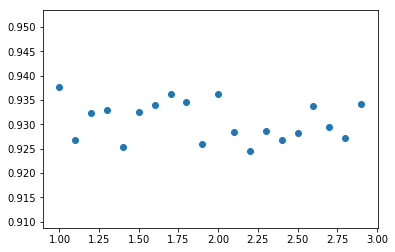

In [15]:
plt.scatter(truncations, accuracies)

In [18]:
from python_custom import s3_helpers
nn_bucket = s3_helpers.get_s3_bucket('neural-net-experiments')

In [20]:
s3_helpers.get_object_from_bucket(nn_bucket, 'mnist_accuracies_weight_scales')

,accuracies,scales
13,0.936286,0.000122
8,0.935429,0.003906
19,0.934429,0.000002
18,0.934429,0.000004
7,0.934429,0.007812
15,0.934000,0.000031
14,0.932571,0.000061
2,0.931857,0.250000
6,0.931571,0.015625
3,0.931143,0.125000


# Testing

In [ ]:
def set_learning_rate(learning_rates, iteration):
    if len(learning_rates) == 0:
        current_learning_rate = 1
    else: 
        current_learning_rate = list_index_wraparound(learning_rates, 
                                                      iteration)
        print("In this iteration of backprop, the learning rate is ", 
              current_learning_rate)
    return current_learning_rate

In [ ]:
learning_rates = [0.2, 0.1]
iteration = 0
set_learning_rate(learning_rates, iteration)

In [ ]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]